## Задание 1
1. Скачать данные по ссылке
https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
2. Считать данные с помощью pandas
3. Вывести на экран первые 5 строк
1.1 Изучите количество памяти с помощью matplotlib
1.2 Изучите стоимость ноутбуков с помощью matplotlib
1.3 Изучите вес ноутбуков с помощью matplotlib
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы


In [1]:
import numpy as np
import pandas as pd

In [2]:
# Считать данные с помощью pandas
df = pd.read_csv("laptop_price.csv", sep=',', encoding='windows-1251')
# Вывести на экран первые 5 строк
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


1.1 Изучите количество памяти с помощью matplotlib

1.2 Изучите стоимость ноутбуков с помощью matplotlib

In [3]:
# ВАРИАНТ 2(без GB): Создать новый признак Memory_Amount, который будет содержать только количество Gb памяти 
# без указания типа носителя
def memory(memory_str):
    # берем значения индекса [0]
    gb = memory_str.split(' ')[0]
    # проверка на содержание букв в конце
    if gb.endswith('GB'):
    # убираем срезом последние символы GB и обернем в веществ. число 
       gb = float(gb[:-2])
    elif gb.endswith('TB'):
       gb = float(gb[:-2])*1024
    return (gb)
df['Memory_Amount'] = df['Memory'].apply(memory)
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_Amount
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,128.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,128.0


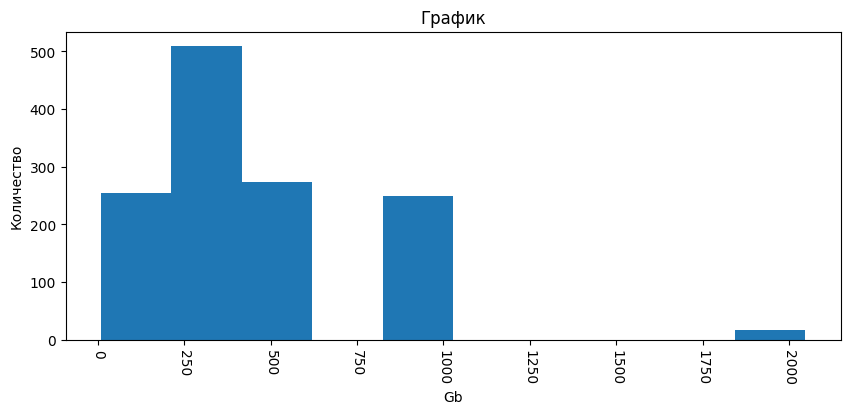

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
# рисование гистограммы (hist)
plt.hist(df['Memory_Amount'])
plt.title("График")
plt.xlabel('Gb')
plt.ylabel('Количество')
plt.xticks(rotation= -90);

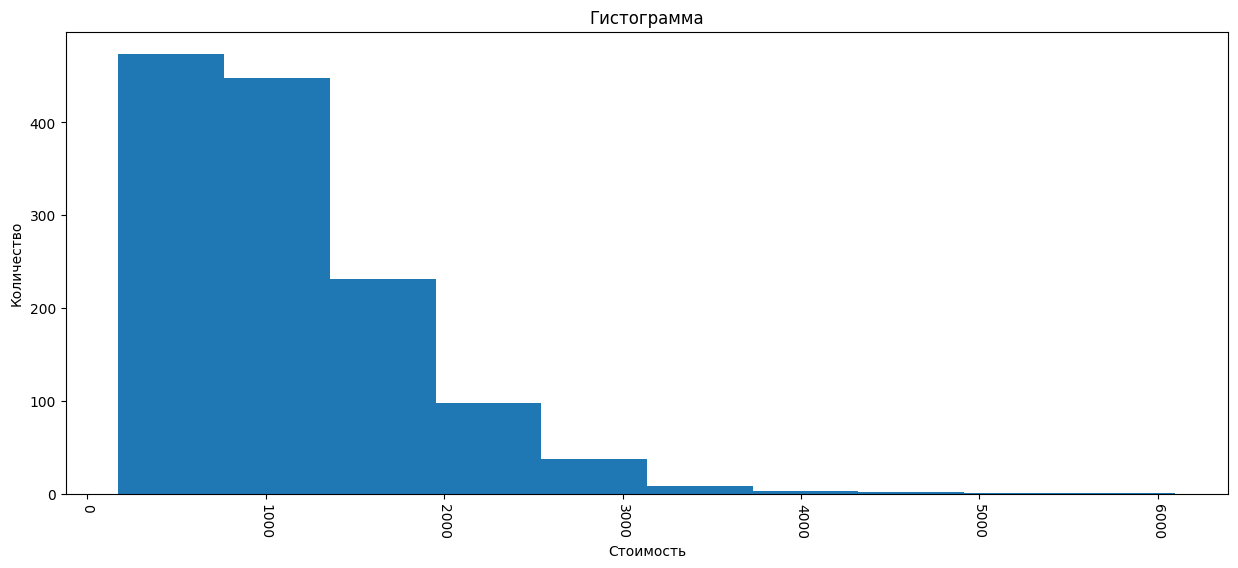

In [5]:
plt.figure(figsize=(15,6))
# рисование гистограммы (hist)
plt.hist(df['Price_euros'])
plt.title("Гистограмма")
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.xticks(rotation= -90);

1.3 Изучите вес ноутбуков с помощью matplotlib

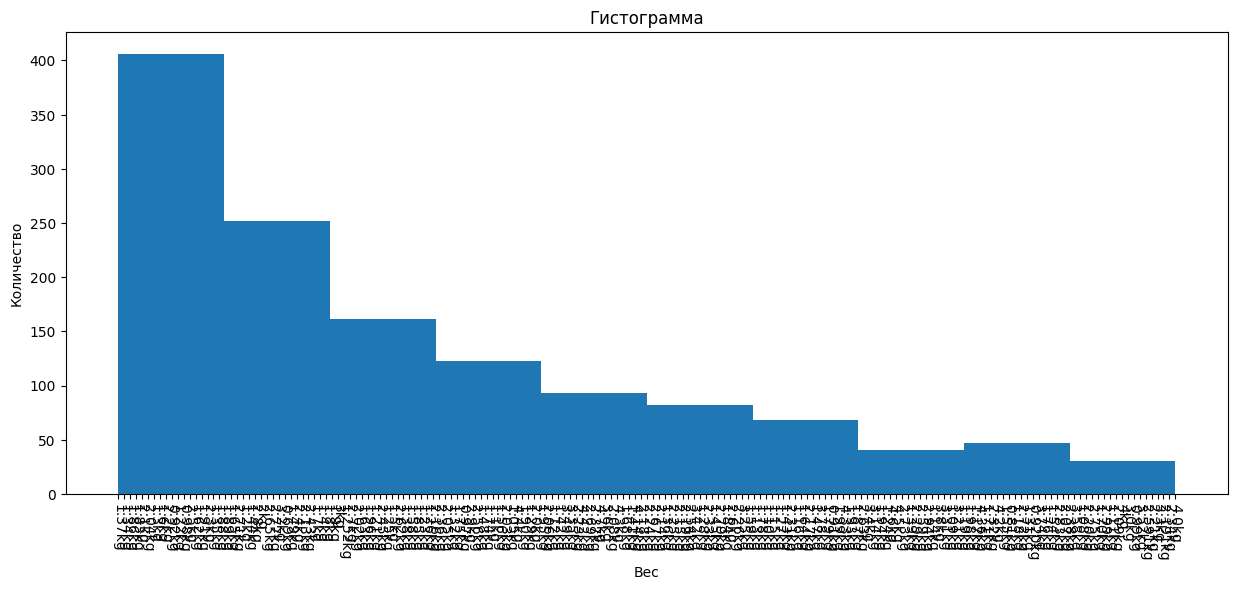

In [6]:
plt.figure(figsize=(15,6))
# рисование гистограммы (hist)
plt.hist(df['Weight'])
plt.title("Гистограмма")
plt.xlabel('Вес')
plt.ylabel('Количество')
plt.xticks(rotation= -90);

## Задание 2
#### 2.1 
Изучите распределение типов носителя
#### 2.2 
Изучите распределение компаний производителей
#### 2.3 
Изучите распределение операционной системы
#### 2.4 
Изучите распределение компаний производителей CPU

*Постройте график*
*Сделайте выводы*

2.1 Изучите распределение типов носителя

In [7]:
df['Memory_Type'] = df['Memory'].apply(lambda x: x.split(' ')[1])
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_Amount,Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,128.0,SSD


In [8]:
# создать обьект, который сделает подсчёт
data = df['Memory_Type'].value_counts()
data

Memory_Type
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: count, dtype: int64

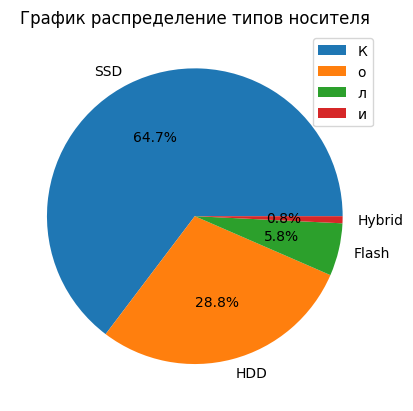

In [9]:
plt.pie(data.values, autopct='%.1f%%', labels= data.index)
plt.title("График распределение типов носителя")
plt.legend('Количество')


2.2 Изучите распределение компаний производителей

In [10]:
# подготовка данных
data1 = df['Company'].value_counts()
data1

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

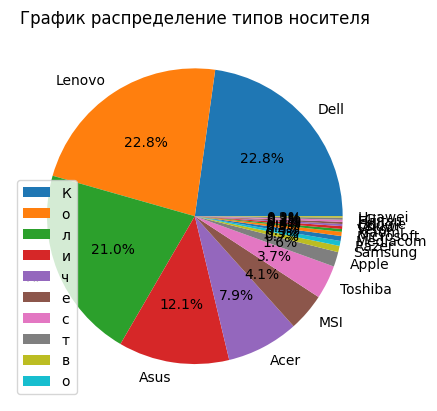

In [11]:
# с помощью pie
plt.pie(data1.values, autopct='%.1f%%', labels= data1.index)
plt.title("График распределение типов носителя")
plt.legend('Количество')

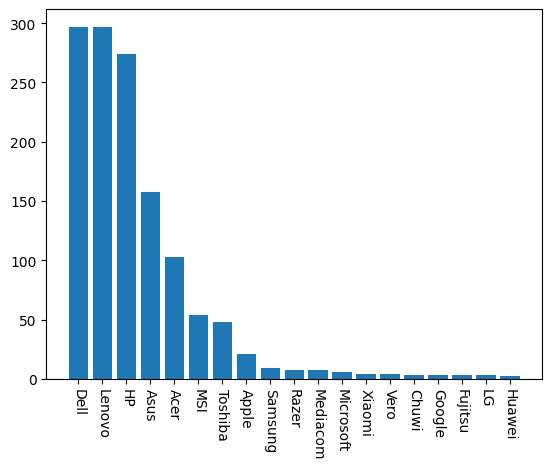

In [12]:
# через гистограмму bar
plt.bar(data1.index, data1.values)
plt.xticks(rotation= -90);

2.3 Изучите распределение операционной системы

In [13]:
data2 = df['OpSys'].value_counts()
data2

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

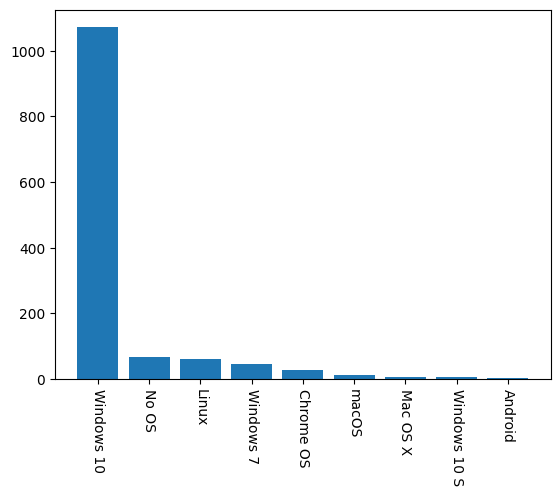

In [14]:
plt.bar(data2.index, data2.values)
plt.xticks(rotation= -90);

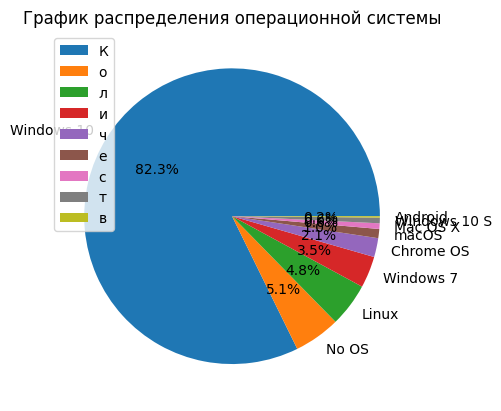

In [15]:
# с помощью pie
plt.pie(data2.values, autopct='%.1f%%', labels= data2.index)
plt.title("График распределения операционной системы")
plt.legend('Количество')

2.4 Изучите распределение компаний производителей CPU


In [16]:
# созданиеновой колонки в которой только название системы
df['Cpu_Company'] = df['Cpu'].apply(lambda x: x.split(' ')[0])
df.head()


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_Amount,Memory_Type,Cpu_Company
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,128.0,SSD,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,128.0,Flash,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,256.0,SSD,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,512.0,SSD,Intel
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,256.0,SSD,Intel


In [17]:
# создание базы (сводной таблицы производителей CPU)
data3 = df['Cpu_Company'].value_counts()
data3

Cpu_Company
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

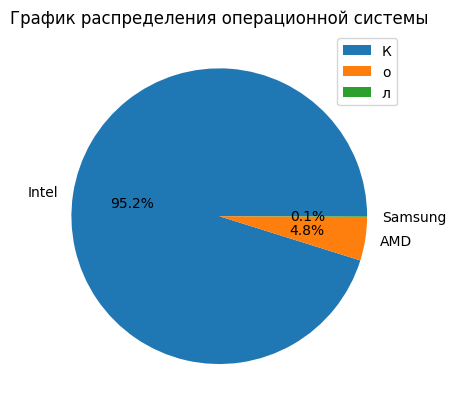

In [18]:
plt.pie(data3.values, autopct='%.1f%%', labels= data3.index)
plt.title("График распределения операционной системы")
plt.legend('Количество')

## Задание 3
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму. Процессоры от Samsung не изучайте
#### 3.1 
Постройте график в абсолютных величинах
#### 3.2 
Постройте график в относительных величинах

In [20]:
# подготовка данных
data4 = pd.crosstab(index = df['Company'],columns = df['Cpu_Company'])
data4 = data4.drop(columns= ['Samsung']).reset_index()
data4         


Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


In [21]:
import numpy as np

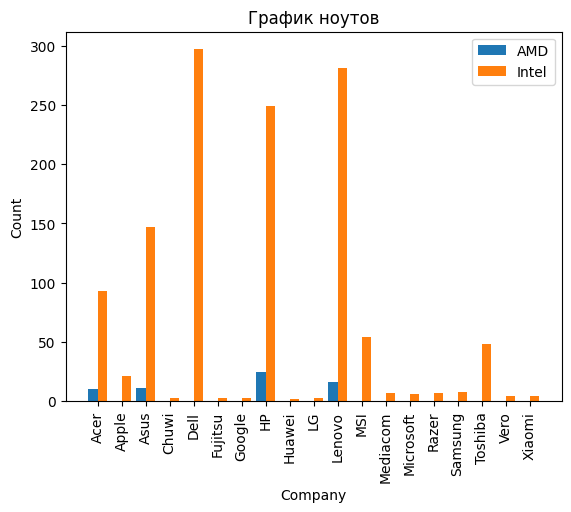

In [23]:
n_ticks = np.arange(len(data4['AMD']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data4['AMD'], width= w)
plt.bar(n_ticks + offset, data4['Intel'], width= w)
plt.title('График ноутов')
plt.xlabel('Company')
plt.ylabel('Count')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data4['Company'],rotation= 90);